In [83]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import nltk
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import os

In [8]:
#import data: sourced from kaggle
data = pd.read_csv('Consumer_Complaints.csv', encoding='latin-1')
data.head()

date_received           product               sub_product  \
0    08/30/2013          Mortgage            Other mortgage   
1    08/30/2013          Mortgage            Other mortgage   
2    08/30/2013  Credit reporting                       NaN   
3    08/30/2013      Student loan  Non-federal student loan   
4    08/30/2013   Debt collection               Credit card   

                                      issue  \
0  Loan modification,collection,foreclosure   
1  Loan servicing, payments, escrow account   
2    Incorrect information on credit report   
3                        Repaying your loan   
4        False statements or representation   

                           sub_issue consumer_complaint_narrative  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                     Account status                          NaN   
3                 Repaying your loan                          NaN   
4  Attempted to collect wrong amount                          NaN   

  company_public_response                          company state zipcode tags  \
0                     NaN                     U.S. Bancorp    CA   95993  NaN   
1                     NaN            Wells Fargo & Company    CA   91104  NaN   
2                     NaN            Wells Fargo & Company    NY   11764  NaN   
3                     NaN          Navient Solutions, Inc.    MD   21402  NaN   
4                     NaN  Resurgent Capital Services L.P.    GA   30106  NaN   

  consumer_consent_provided submitted_via date_sent_to_company  \
0                       NaN      Referral           09/03/2013   
1                       NaN      Referral           09/03/2013   
2                       NaN   Postal mail           09/18/2013   
3                       NaN         Email           08/30/2013   
4                       NaN           Web           08/30/2013   

  company_response_to_consumer timely_response consumer_disputed?  \
0      Closed with explanation             Yes                Yes   
1      Closed with explanation             Yes                Yes   
2      Closed with explanation             Yes                 No   
3      Closed with explanation             Yes                Yes   
4      Closed with explanation             Yes                Yes   

   complaint_id  
0        511074  
1        511080  
2        510473  
3        510326  
4        511067

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

In [11]:
#selecting needed columns
data = data[['product', 'consumer_complaint_narrative']]
data.head()

product consumer_complaint_narrative
0          Mortgage                          NaN
1          Mortgage                          NaN
2  Credit reporting                          NaN
3      Student loan                          NaN
4   Debt collection                          NaN

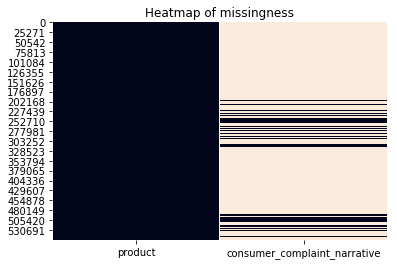

In [12]:
#missing heat map
sns.heatmap(data.isnull(), cbar=False)
plt.title('Heatmap of missingness')
plt.show()

In [13]:
np.sum(data.isnull())

product                              0
consumer_complaint_narrative    489151
dtype: int64

In [14]:
#remove na from consumer_complaint_narrative 
data = data[pd.notnull(data['consumer_complaint_narrative'])]

In [16]:
np.sum(data.isnull())

product                         0
consumer_complaint_narrative    0
dtype: int64

In [17]:
data.head()

product                       consumer_complaint_narrative
190126  Debt collection  XXXX has claimed I owe them {$27.00} for XXXX ...
190135    Consumer Loan  Due to inconsistencies in the amount owed that...
190155         Mortgage  In XX/XX/XXXX my wages that I earned at my job...
190207         Mortgage  I have an open and current mortgage with Chase...
190208         Mortgage  XXXX was submitted XX/XX/XXXX. At the time I s...

In [58]:
#factorize product column into categories
data['category_id'] = data['product'].factorize()[0]
data.head()

product                       consumer_complaint_narrative  \
190126  Debt collection  XXXX has claimed I owe them {$27.00} for XXXX ...   
190135    Consumer Loan  Due to inconsistencies in the amount owed that...   
190155         Mortgage  In XX/XX/XXXX my wages that I earned at my job...   
190207         Mortgage  I have an open and current mortgage with Chase...   
190208         Mortgage  XXXX was submitted XX/XX/XXXX. At the time I s...   

        category_id  
190126            0  
190135            1  
190155            2  
190207            2  
190208            2

In [26]:
data['category_id'].nunique()

11

In [31]:
data.groupby('product').count()

consumer_complaint_narrative  category_id
product                                                           
Bank account or service                          5711         5711
Consumer Loan                                    3678         3678
Credit card                                      7929         7929
Credit reporting                                12526        12526
Debt collection                                 17552        17552
Money transfers                                   666          666
Mortgage                                        14919        14919
Other financial service                           110          110
Payday loan                                       726          726
Prepaid card                                      861          861
Student loan                                     2128         2128

Visualizing data distribution on pie chart


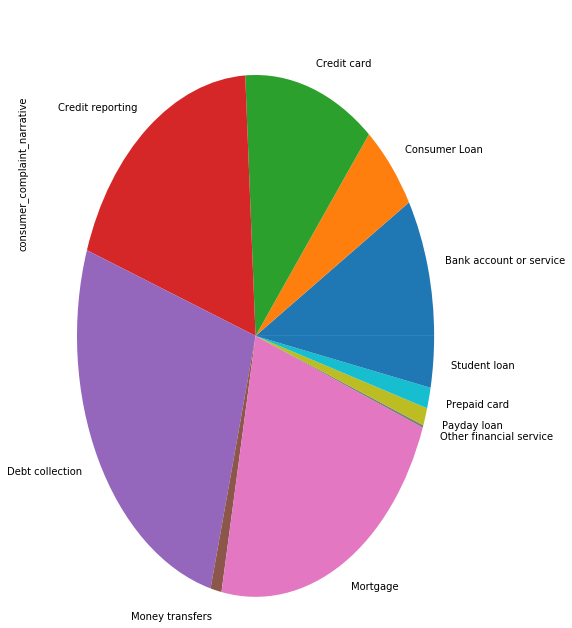

In [45]:
fig = plt.figure(figsize=(8,6))
data.groupby('product').consumer_complaint_narrative.count().plot.pie(ylim=0)
plt.show()

Visualizing data distribution on bar plot

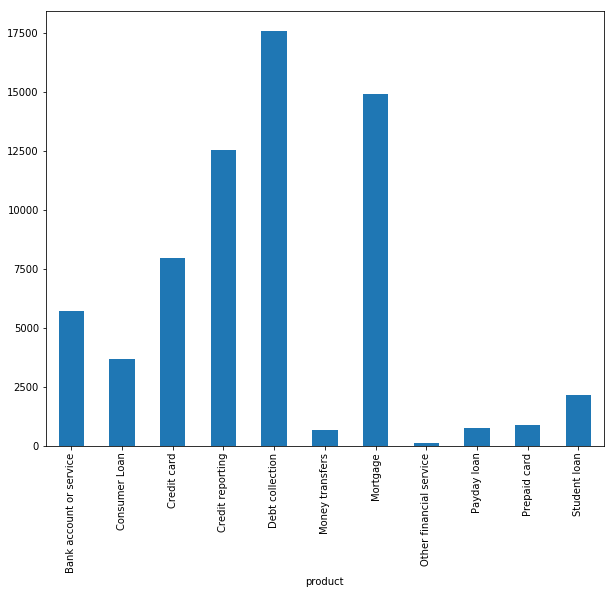

In [39]:
fig = plt.figure(figsize=(10,8))
data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

Futher analysis of product using Wordcloud

In [63]:
categ = data.groupby('product').agg({"consumer_complaint_narrative": ' | '.join})

In [66]:
categ

consumer_complaint_narrative
product                                                                   
Bank account or service  I opened an account with M & T bank online on ...
Consumer Loan            Due to inconsistencies in the amount owed that...
Credit card              i opened XXXX Bank of America credit cards 15-...
Credit reporting         Transunion # XXXXSince I received the letter f...
Debt collection          XXXX has claimed I owe them {$27.00} for XXXX ...
Money transfers          I was scammed into sending money for a XXXX bo...
Mortgage                 In XX/XX/XXXX my wages that I earned at my job...
Other financial service  I started their program in XXXX of 2012. I bel...
Payday loan              I 'm receiving calls from a company who will n...
Prepaid card             I was offered a pre-paid card from Continental...
Student loan             I am trying to deal with Navient ( formerly XX...

Wordcloud analysis of credit reporting

In [111]:
#data extraction
credit_repo = categ.iloc[3,0]

In [86]:
#preprocsessing for visualization
def review_to_words(raw_review):
    bs = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', bs)
    #tokenization
    words_only = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    words = [w for w in words_only if not w in stops]
    return (" ".join(words))

In [87]:
clean_credit_repo = str(review_to_words(credit_repo))

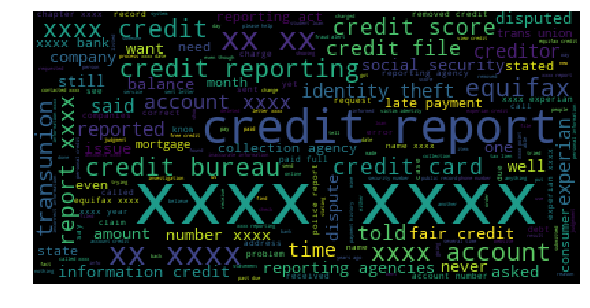

In [89]:
wordcloud = WordCloud().generate(clean_credit_repo) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [90]:
#re-analyzing the complains without the xxxx words
cleaned_credit_repo = clean_credit_repo.replace ('xxxx','')

In [91]:
cleaned_credit_repo = clean_credit_repo.replace ('xx','')

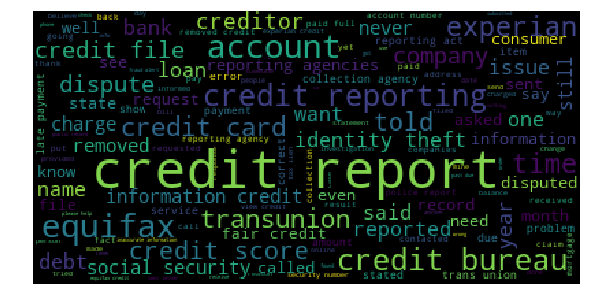

In [92]:
wordcloud = WordCloud().generate(cleaned_credit_repo) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Wordcloud analysis of Mortgage complains

In [110]:
#data extraction
mortg = categ.iloc[6,0]

In [98]:
#preprocsessing for visualization
def review_to_words(raw_review):
    bs = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', bs)
    words_only = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    words = [w for w in words_only if not w in stops]
    return (" ".join(words))

In [109]:
cleaned_mortg = str(review_to_words(mortg)).replace('xxxx', '').replace('xx','')


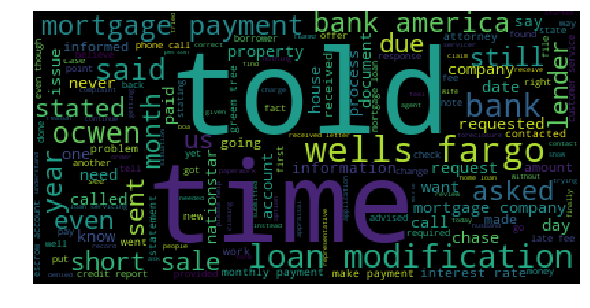

In [103]:
wordcloud = WordCloud().generate(cleaned_mortg) 
  
# plottin the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Wordcloud analysis of Debt collection complains

In [104]:
#data extraction
dc = categ.iloc[4,0]
#cleaning function for visualization
def review_to_words(raw_review):
    bs = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub('[^a-zA-Z]', ' ', bs)
    words_only = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    words = [w for w in words_only if not w in stops]
    return (" ".join(words))

In [105]:
#conversion to string from unicode and futher cleaning
cleaned_dc = str(review_to_words(dc)).replace('xxxx', '').replace('xx','')
cleaned_dc

' claimed owe  years despite proof payment sent canceled check ownpaid invoice continue insist owe collection agencies stop harassment bill already paid four years ago incorrect reporting cavalry portfolio credit report shows collection account knowledge debt requested investigation credit agency creditor got response letter credit agency going update credit report show disputed account number  lawyers law firm  sent letter stating hired bank  prosecute legal proceedings enforce security interest collect debt mortgage filed affidavits court declaring hired collect debt bank filed foreclosure banks name bank never loan property paid banks merged two years contacting bank filed affidavit stating bank hire pay firm file foreclosure contacted bank firm tried get dismissed erased record    filed police report regarding wallet stolen money credit cards driver license ss card checks immediately went bank closed account reopened new one received new checks different account number person stole

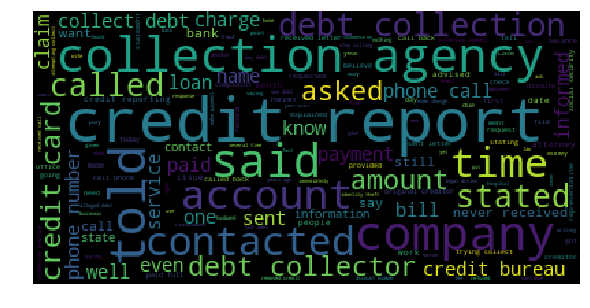

In [106]:
wordcloud = WordCloud().generate(cleaned_dc) 
  
# plottin the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Modelling

In [47]:
#splitting the data
x_train, x_test, y_train, y_test = model_selection.train_test_split(data['consumer_complaint_narrative'], data['product'])


In [48]:
#word emedding using term frequency - inverse document frequency TFIDF
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

tfidf_vec = TfidfVectorizer(analyzer='word',
                           token_pattern=r'\w{1,}',
                            max_features=5000)
tfidf_vec.fit(data['consumer_complaint_narrative'])
xtrain_tfidf = tfidf_vec.transform(x_train)
xtest_tfidf = tfidf_vec.transform(x_test)

In [52]:
#modelling
model = linear_model.LogisticRegression(solver='newton-cg', 
                                        multi_class='multinomial').fit(xtrain_tfidf, 
                                                                       y_train)


In [53]:
#checking accuracy
accuracy = metrics.accuracy_score(model.predict(xtest_tfidf), y_test)
print("Accuracy: ", accuracy)

('Accuracy: ', 0.8501975811280086)


In [54]:
#classification report
print(metrics.classification_report(y_test, model.predict(xtest_tfidf), 
                                    target_names=data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.83      0.80      0.82      1453
          Consumer Loan       0.79      0.61      0.69       952
               Mortgage       0.80      0.84      0.82      1905
            Credit card       0.85      0.86      0.86      3142
       Credit reporting       0.83      0.89      0.86      4403
           Student loan       0.79      0.48      0.60       185
Bank account or service       0.92      0.95      0.94      3731
            Payday loan       0.00      0.00      0.00        34
        Money transfers       0.63      0.26      0.36       180
Other financial service       0.80      0.67      0.73       186
           Prepaid card       0.91      0.77      0.83       531

              micro avg       0.85      0.85      0.85     16702
              macro avg       0.74      0.65      0.68     16702
           weighted avg       0.85      0.85      0.85     16702



/Users/oluwolealowolodu/anaconda3/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Applying the model - 1

In [61]:
complain = ["This company refuses to provide me verification and validation of debt"
            + "per my right under the FDCPA.I do not believe this debt is mine."]

text_features = tfidf_vec.transform(complain)
predictions = model.predict(text_features)
print(complain)
print('Is predicted as: {}'.format(data.loc[data['category_id']==predictions[0], 
                                            'product'].iloc[0]))
            

['This company refuses to provide me verification and validation of debtper my right under the FDCPA.I do not believe this debt is mine.']
Is predicted as: Credit reporting


Applying the model - 2

In [108]:
complain = ["I am writing to your company about a problem with my Hoverbike, a 2012 Skylark model. I began to have trouble staying aloft a few months ago, and this week the height control module completely failed. While the bicycle is a few months out of warranty, I believe that this occurred because of a design flaw in the Skylark, and I am asking that your company cover or share with me the cost of the required repair."]

text_features = tfidf_vec.transform(complain)
predictions = model.predict(text_features)
print(complain)
print('Is predicted as: {}'.format(data.loc[data['category_id']==predictions[0], 
                                            'product'].iloc[0]))
    

['I am writing to your company about a problem with my Hoverbike, a 2012 Skylark model. I began to have trouble staying aloft a few months ago, and this week the height control module completely failed. While the bicycle is a few months out of warranty, I believe that this occurred because of a design flaw in the Skylark, and I am asking that your company cover or share with me the cost of the required repair.']
Is predicted as: Bank account or service
